In [13]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import glob
import os
import math
from os import listdir
import data_visualization as dv
import pickle
import scipy 
from scipy.stats import norm
from scipy import stats
from tqdm import tqdm 
import random

In [14]:
plt.style.use('cashaback_dark')
wheel = dv.ColorWheel()

In [15]:
# Initial thangs
os.chdir('D:\\Subject_Data\\Seth_MatchPennies_Agent_Exp1\\')
PATH = os.getcwd()
SAVE_PATH = PATH+'Group_Figures\\'
if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)

# Fields pull and pull list
os.chdir('D:\Subject_Data\Seth_MatchPennies_Agent_Exp1')
PATH = os.getcwd()
figures_pull_list = []
figures_pull_list_control = []
figures_pull_list_task = []
fields_pull = []
with open(PATH+"\\Figures_Pull_List.txt", "r") as pull_file:
    figures_pull_list = pull_file.read().splitlines()
with open(PATH+"\\Figures_Pull_List_Control.txt", "r") as pull_file:
    analysis_pull_list_control = pull_file.read().splitlines()
with open(PATH+"\\Figures_Pull_List_task.txt", "r") as pull_file:
    analysis_pull_list_washout = pull_file.read().splitlines()
with open(PATH+"\\Fields_Pull.txt", "r") as fields_pull:
    fields_pull = fields_pull.read().splitlines()
num_subjects = len(figures_pull_list)
washout_name = 'Seth_MatchPennies_Agent_Exp1'

In [16]:
#%% Plot properties
box_lw = 2.5 #box linewidth
boxwidth = .07 #box width
whisker_lw = 2.0 #whisker linewidth
circle_size = 8 


trial_block_titles = ['Washout 1','Washout 2','Washout 3','Washout 4','Washout 5','Washout 6',]

box_color1 = wheel.seth_red
box_color2 = wheel.seth_blue
box_color3 = '0.4'
#boxprops
two_props = {"facecolor": "none", "edgecolor" : box_color1, "linewidth": box_lw, "alpha": 1}
three_props = {"facecolor": "none", "edgecolor" : box_color2, "linewidth": box_lw, "alpha": 1}
four_props = {"facecolor": "none", "edgecolor" : box_color3, "linewidth": box_lw, "alpha": 1}
#whiskerprops
two_whisk = {"linewidth" : whisker_lw, "color": box_color1}
three_whisk = {"linewidth" : whisker_lw, "color": box_color2}
four_whisk = {"linewidth" : whisker_lw, "color": box_color3}
#capprops
two_cap = {"linewidth" : whisker_lw, "color": box_color1}
three_cap = {"linewidth" : whisker_lw, "color": box_color2}
four_cap = {"linewidth" : whisker_lw, "color": box_color3}
#medianprops
two_median = {"linewidth" : whisker_lw, "color": box_color1}     
three_median = {"linewidth" : whisker_lw, "color": box_color2}   
four_median = {"linewidth" : whisker_lw, "color": box_color3}        
    
#total_indecisions = np.concatenate((perc_player_indecisions,perc_indecisions_R))
props = [{}, {}, {}, {}, {}, {}]
props_dict = {}
box_color = 'grey'
dot_color = 'black'   

### Functions

In [17]:
#%% Box plot with option to make double boxplot
def boxplot(data, xlocs, ylocs, box_widths = 0.15, shift_box = False, shift_direction = 1, 
            legend_labels = None, xlab = None, ylab=None, title=None):
    og_xlocs = xlocs
    box_xlocs = xlocs
    props = [two_props,two_whisk,two_cap,two_median]
    if shift_box:
        box_xlocs = box_xlocs + shift_direction*box_widths*4
        xlocs = xlocs + shift_direction*box_widths*4
        if shift_direction == 1:
            props = [three_props,three_whisk,three_cap,three_median]
        else:
            props = [two_props,two_whisk,two_cap,two_median]

    filtered_data = data
    if np.isnan(data).any():
        mask = ~np.isnan(data)
        filtered_data = [d[m] for d,m in zip(data.T, mask.T)]
    else:
        filtered_data = data
    ax.patch.set_alpha(0.05)
    markercolor = ['orange','r','g','b','black',wheel.dark_blue]
    ax.boxplot(filtered_data, positions=box_xlocs, patch_artist=True, boxprops = props[0], whiskerprops = props[1], 
                capprops = props[2], medianprops = props[3], showfliers=False, widths = (box_widths)*len(xlocs))
    ax.set_xticks(og_xlocs) 
    #ax.set_xticklabels(trial_block_titles)
    ax.set_yticks(ylocs)
    ax.set_yticklabels(ylocs) 
    ax.set_xlabel(xlab, fontweight = 'semibold')
    ax.set_ylabel(ylab, fontweight = 'semibold')
    ax.set_title(title, fontweight = 'semibold')
    if shift_box:
        colors = [wheel.seth_red, wheel.seth_blue]
        dv.Custom_Legend(ax, legend_labels, colors, fontsize = 12)

In [18]:
def jitter(xlocs, data):
    if data.ndim >1:
        xlocs = np.tile(xlocs,(np.shape(data)[0],1))
        xlocs = xlocs + np.random.normal(0,0.05, np.shape(data))
    else:
        xlocs = xlocs + np.random.normal(0,0.05, np.shape(data))
    return xlocs

In [19]:
#%% Box plot with option to make double boxplot
def violinplot(data, xlocs, ylocs, box_widths = 0.15, shift_box = False, shift_direction = 1, 
            legend_labels = None, xlab = None, ylab=None, title=None):
    og_xlocs = xlocs
    box_xlocs = xlocs
    props = [two_props,two_whisk,two_cap,two_median]
    if shift_box:
        box_xlocs = box_xlocs + shift_direction*box_widths*4
        xlocs = xlocs + shift_direction*box_widths*4
        if shift_direction == 1:
            props = [three_props,three_whisk,three_cap,three_median]
        else:
            props = [two_props,two_whisk,two_cap,two_median]

    filtered_data = data
    if np.isnan(data).any():
        mask = ~np.isnan(data)
        filtered_data = [d[m] for d,m in zip(data.T, mask.T)]
    else:
        filtered_data = data
    ax.patch.set_alpha(0.05)
    markercolor = ['orange','r','g','b','black',wheel.dark_blue]
    ax.violinplot(filtered_data, positions=box_xlocs)
    ax.set_xticks(og_xlocs) 
    #ax.set_xticklabels(trial_block_titles)
    ax.set_yticks(ylocs)
    ax.set_yticklabels(ylocs) 
    ax.set_xlabel(xlab, fontweight = 'semibold')
    ax.set_ylabel(ylab, fontweight = 'semibold')
    ax.set_title(title, fontweight = 'semibold')
    if shift_box:
        colors = [wheel.dark_blue,wheel.dark_red]
        dv.Custom_Legend(ax, legend_labels, colors, fontsize = 12)


In [20]:
#%% Scatter plot, two separate data sets on same plot
def two_data_scatter_correlation(data1a, data1b, data2a, data2b, 
                                 X_locations, Y_locations, 
                                 xlab, ylab, title, color1, color2, 
                                 savename, save):
    # =============================================================================
    #     Calculate Linear model
    # =============================================================================
    # Combine the two groups ------------------------------------------------
    all_data_a = np.concatenate((data1a,data2a))
    all_data_a = all_data_a.flatten()
    all_data_b = np.concatenate((data1b,data2b))
    all_data_b = all_data_b.flatten()
    
    # Linear model ---------------------------------------------------------------
    
    print(all_data_a)
    print()
    print(all_data_b)
    lm = stats.linregress(all_data_a,all_data_b)
    x = np.arange(min(X_locations)+2,max(X_locations)-10,10)
    y = lm.slope*x + lm.intercept
    spear_r = stats.spearmanr(all_data_a, all_data_b)
    if save:
        label_color = 'w'
        params = {"ytick.color" : label_color,
                  "xtick.color" : label_color,
                  "axes.labelcolor" : label_color,
                  "axes.edgecolor" : label_color,
                  "axes.titlecolor": label_color, 
                  'legend.labelcolor': label_color,
                  }
        plt.rcParams.update(params)
    else:
        label_color = 'black'
        params = {"ytick.color" : label_color,
                  "xtick.color" : label_color,
                  "axes.labelcolor" : label_color,
                  "axes.edgecolor" : label_color,
                  "axes.titlecolor": label_color, 
                  'legend.labelcolor': label_color,
                  }
        plt.rcParams.update(params)
    plt.figure(dpi = 300, figsize = (6,4))
    X_locations = X_locations
    Y_locations = Y_locations
    ax = plt.subplot()
    ax.patch.set_alpha(0.05)
    ax.scatter(data1a, data1b, c = color1)
    ax.scatter(data2a, data2b, c = color2)
    ax.plot(x,y,c='grey')
    ax.text(X_locations[2],Y_locations[2],r'$\rho$'+f' = {spear_r.correlation:0.3f}')
    ax.text(X_locations[2],Y_locations[2]-17,r'p'+f' = {spear_r.pvalue:0.3f}')
    ax.set_xticks(X_locations)
    ax.set_xticklabels(X_locations)
    ax.set_yticks(Y_locations)
    ax.set_yticklabels(Y_locations) 
    ax.set_xlabel(xlab, fontweight = 'semibold')
    ax.set_ylabel(ylab, fontweight = 'semibold')
    ax.set_title(title, fontweight = 'semibold')
    labels = ["Full Feedback", "Feedback Loss"]
    colors = [wheel.dark_blue, wheel.dark_red]
    dv.Custom_Legend(ax, labels, colors, fontsize = 12)
    plt.tight_layout()
    if save:
        plt.savefig(PATH+SAVE_PATH+savename, dpi = 400, transparent = True, bbox_inches='tight')
    plt.show()

In [21]:
#%% Scatter plot, one data set 
def one_data_scatter_correlation(data1a, data1b,
                                 X_locations, Y_locations, 
                                 xlab, ylab, title, color1, color2, 
                                 savename, save):
    data1_f = data1a.flatten()
    data2_f= data1b.flatten()
    lm = stats.linregress(data1_f,data2_f)
    x = np.arange(min(X_locations)+2,max(X_locations)-10,10)
    y = lm.slope*x + lm.intercept
    spear_r = stats.spearmanr(data1_f, data2_f)
    if save:
        label_color = 'w'
        params = {"ytick.color" : label_color,
                  "xtick.color" : label_color,
                  "axes.labelcolor" : label_color,
                  "axes.edgecolor" : label_color,
                  "axes.titlecolor": label_color, 
                  'legend.labelcolor': label_color,
                  }
        plt.rcParams.update(params)
    else:
        label_color = 'black'
        params = {"ytick.color" : label_color,
                  "xtick.color" : label_color,
                  "axes.labelcolor" : label_color,
                  "axes.edgecolor" : label_color,
                  "axes.titlecolor": label_color, 
                  'legend.labelcolor': label_color,
                  }
        plt.rcParams.update(params)
    plt.figure(dpi = 300, figsize = (6,4))
    X_locations = X_locations
    Y_locations = Y_locations
    ax = plt.subplot()
    ax.patch.set_alpha(0.05)
    ax.scatter(data1a, data1b, c = color1)
    ax.plot(x,y,c='grey')
    ax.text(X_locations[2],Y_locations[2],r'$\rho$'+f' = {spear_r.correlation:0.3f}')
    ax.text(X_locations[2],Y_locations[2]-17,r'p'+f' = {spear_r.pvalue:0.3f}')
    ax.set_xticks(X_locations)
    ax.set_xticklabels(X_locations)
    ax.set_yticks(Y_locations)
    ax.set_yticklabels(Y_locations) 
    ax.set_xlabel(xlab, fontweight = 'semibold')
    ax.set_ylabel(ylab, fontweight = 'semibold')
    ax.set_title(title, fontweight = 'semibold')
    labels = ["Full Feedback", "Feedback Loss"]
    colors = [wheel.dark_blue, wheel.dark_red]
    #dv.Custom_Legend(ax, labels, colors, fontsize = 12)
    plt.tight_layout()
    if save:
        plt.savefig(PATH+SAVE_PATH+savename, dpi = 400, transparent = True, bbox_inches='tight')
    plt.show()

### Pickle

Pickle Load Control washouts


In [22]:
coincidence_trials = 50
reaction_trials = 50
interval_trials = 50
# ---------------Controls-------------------------
player_reaction_decision_array = np.empty((num_subjects, reaction_trials))
agent_reaction_decision_array = np.empty((num_subjects, reaction_trials))
reaction_time = np.zeros([num_subjects,reaction_trials])*np.nan 
reaction_movement_time = np.zeros([num_subjects,reaction_trials])*np.nan
reaction_trial_start = np.zeros((num_subjects,reaction_trials))*np.nan 
coincidence_trial_start = np.zeros((num_subjects, coincidence_trials))*np.nan
coincidence_reach_time = np.zeros((num_subjects, coincidence_trials))*np.nan
interval_trial_start = np.zeros((num_subjects, interval_trials))*np.nan
interval_reach_time = np.zeros((num_subjects, interval_trials))*np.nan

for i in range(num_subjects):
    subname = figures_pull_list[i]
    data_path = PATH+f'\\Subjects_Analyzed\\{subname}\\'
    reaction_trial_start[i,:] = pickle.load(open(data_path + f'{subname}_reaction_trial_start.pkl', 'rb'))
    reaction_time[i,:] = pickle.load(open(data_path + f'{subname}_player_reaction_time.pkl', 'rb'))
    reaction_movement_time[i,:] = pickle.load(open(data_path + f'{subname}_player_reaction_movement_time.pkl', 'rb'))
    player_reaction_decision_array[i,:] = pickle.load(open(data_path + f'{subname}_player_reaction_decision_array.pkl', 'rb'))
    agent_reaction_decision_array[i,:] = pickle.load(open(data_path + f'{subname}_agent_reaction_decision_time.pkl', 'rb'))
    reaction_trial_start[i,:] = pickle.load(open(data_path + f'{subname}_reaction_trial_start.pkl', 'rb'))
    interval_trial_start[i,:] = pickle.load(open(data_path + f'{subname}_interval_trial_start.pkl', 'rb'))
    interval_reach_time[i,:] = pickle.load(open(data_path + f'{subname}_interval_reach_time.pkl', 'rb'))
    coincidence_trial_start[i,:] = pickle.load(open(data_path + f'{subname}_coincidence_trial_start.pkl', 'rb'))
    coincidence_reach_time[i,:] =  pickle.load(open(data_path + f'{subname}_coincidence_reach_time.pkl', 'rb'))

Pickle Load washout and Washout

In [23]:
path1 = PATH+'\\'+'Sub1_Task'
washout_df = pd.read_csv(path1+f'\\Sub1_TaskTrial_Table.csv')
washout_df = washout_df.loc[washout_df['Condition type']==3] # Only get the washout condition 
washout_trials = int(washout_df.iloc[-1]['Block_Step']) # number of trials in each block
num_blocks = int(washout_df.iloc[-1]['Block_Row']/2)
tot_trials = int(washout_trials*num_blocks)
trial_time = int(washout_df.iloc[0]['Condition time'])
washout_df_columns = len(fields_pull)
trial_table = np.empty((num_subjects, tot_trials, 4), int)
#----------------- washout--------------------------------
player_washout_reach_time = np.zeros([num_subjects,num_blocks,washout_trials])*np.nan 
player_washout_decision_time = np.zeros([num_subjects,num_blocks,washout_trials])*np.nan 
player_washout_decision_array = np.zeros([num_subjects,num_blocks,washout_trials])*np.nan
player_washout_movement_time = np.zeros([num_subjects,num_blocks,washout_trials])*np.nan
agent_washout_reach_time = np.zeros([num_subjects,num_blocks,washout_trials])*np.nan 
agent_washout_decision_time = np.zeros([num_subjects,num_blocks,washout_trials])*np.nan 
agent_washout_decision_array = np.zeros([num_subjects,num_blocks,washout_trials])*np.nan

# -------------- Washout-------------------
washout_trials = 25
player_washout_reach_time = np.zeros([num_subjects,num_blocks,washout_trials])*np.nan 
player_washout_decision_time = np.zeros([num_subjects,num_blocks,washout_trials])*np.nan 
player_washout_decision_array = np.zeros([num_subjects,num_blocks,washout_trials])*np.nan
player_washout_movement_time = np.zeros([num_subjects,num_blocks,washout_trials])*np.nan
agent_washout_reach_time = np.zeros([num_subjects,num_blocks,washout_trials])*np.nan 
agent_washout_decision_time = np.zeros([num_subjects,num_blocks,washout_trials])*np.nan 
agent_washout_decision_array = np.zeros([num_subjects,num_blocks,washout_trials])*np.nan
agent_washout_movement_time = np.zeros([num_subjects,num_blocks,washout_trials])*np.nan

for i in range(num_subjects):
    subname = figures_pull_list[i]
    data_path = PATH+f'\\Subjects_Analyzed\\{subname}\\'
    #washout_data[i,:,:,:,:] = pickle.load(open(data_path + f'{subname}_washout_data.pkl', 'rb'))
    player_washout_decision_time[i,:,:] = pickle.load( open(data_path + f'{subname}_player_washout_decision_time.pkl', 'rb'))
    player_washout_decision_array[i,:,:] = pickle.load( open(data_path + f'{subname}_player_washout_decision_array.pkl', 'rb'))
    player_washout_movement_time[i,:,:] = pickle.load(open(data_path + f'{subname}_player_washout_movement_time.pkl', 'rb'))
    player_washout_reach_time[i,:,:] = pickle.load( open(data_path + f'{subname}_player_washout_reach_time.pkl', 'rb'))
    agent_washout_decision_time[i,:,:] = pickle.load( open(data_path + f'{subname}_agent_washout_decision_time.pkl', 'rb'))
    agent_washout_decision_array[i,:,:] = pickle.load(open(data_path + f'{subname}_agent_washout_decision_array.pkl', 'rb'))
    agent_washout_reach_time[i,:,:] = pickle.load(open(data_path + f'{subname}_agent_washout_reach_time.pkl', 'rb'))
    player_washout_decision_time[i,:,:] = pickle.load( open(data_path + f'{subname}_player_washout_decision_time.pkl', 'rb'))
    player_washout_decision_array[i,:,:] = pickle.load( open(data_path + f'{subname}_player_washout_decision_array.pkl', 'rb'))
    player_washout_movement_time[i,:,:] = pickle.load(open(data_path + f'{subname}_player_washout_movement_time.pkl', 'rb'))
    player_washout_reach_time[i,:,:] = pickle.load( open(data_path + f'{subname}_player_washout_reach_time.pkl', 'rb'))
    agent_washout_decision_time[i,:,:] = pickle.load( open(data_path + f'{subname}_agent_washout_decision_time.pkl', 'rb'))
    agent_washout_decision_array[i,:,:] = pickle.load(open(data_path + f'{subname}_agent_washout_decision_array.pkl', 'rb'))
    agent_washout_reach_time[i,:,:] = pickle.load(open(data_path + f'{subname}_agent_washout_reach_time.pkl', 'rb'))

### Calculations

#### Calculations (Control)

Reaction and Reaction Movement Time

In [24]:
#%% Calculate RT means and sds
reaction_time = np.where(reaction_time<200,np.nan,reaction_time) # Anytime someone reacted under 200 ms, replace with nan
reaction_plus_movement_time = reaction_time + reaction_movement_time
reaction_plus_movement_time_mean = np.nanmean(reaction_plus_movement_time, axis = 1)
reaction_plus_movement_time_sd = np.nanstd(reaction_plus_movement_time,axis=1)
reaction_movement_time_mean = np.nanmean(reaction_movement_time[:,10:], axis = 1)
reaction_movement_time_sd = np.nanstd(reaction_movement_time[:,10:], axis = 1)
reaction_time_mean = np.nanmean(reaction_time[:,10:], axis = 1)
reaction_time_sd = np.nanstd(reaction_time[:,10:], axis = 1)

Coincidence Timing

In [25]:
coincidence_reach_time_mean = np.nanmean(coincidence_reach_time[:,10:], axis=1)
coincidence_reach_time_sd =  np.nanstd(coincidence_reach_time[:,10:], axis=1)

Interval Timing

In [26]:
interval_reach_time_mean = np.nanmean(interval_reach_time[:,10:], axis=1)
interval_reach_time_sd =  np.nanstd(interval_reach_time[:,10:], axis=1)

#### Calculations (Washout)

Indecisions, Wins, Incorrects

In [27]:
# Win, Loss, Indecision counts
agent_washout_decision_array = np.where(agent_washout_decision_array == 2,-1,agent_washout_decision_array) # Make sure agent_washout_decision_array replaces 2 with -1 from the first pilot
player_washout_indecisions = np.zeros((num_subjects, num_blocks))
player_washout_wins = np.zeros((num_subjects, num_blocks))
player_washout_incorrects = np.zeros((num_subjects,num_blocks))
for i in range(num_subjects):
    for j in range(num_blocks):
        player_washout_indecisions[i,j] = np.count_nonzero(player_washout_decision_array[i,j,:] == 0)
        player_washout_wins[i,j] = np.count_nonzero(np.logical_and(player_washout_decision_array[i,j,:] == 1 , agent_washout_decision_array[i,j,:] == 1))
        player_washout_wins[i,j]+= np.count_nonzero(np.logical_and(player_washout_decision_array[i,j,:] == -1 , agent_washout_decision_array[i,j,:] == -1))
        player_washout_wins[i,j]+= np.count_nonzero(np.logical_and(player_washout_decision_array[i,j,:] == -1 , agent_washout_decision_array[i,j,:] == 0))
        player_washout_wins[i,j]+= np.count_nonzero(np.logical_and(player_washout_decision_array[i,j,:] == 1 , agent_washout_decision_array[i,j,:] == 0))
        player_washout_incorrects[i,j] = np.count_nonzero(np.logical_and(player_washout_decision_array[i,j,:] == 1 , agent_washout_decision_array[i,j,:] == -1))
        player_washout_incorrects[i,j] += np.count_nonzero(np.logical_and(player_washout_decision_array[i,j,:] == -1 , agent_washout_decision_array[i,j,:] == 1))
perc_player_washout_indecisions = (player_washout_indecisions / washout_trials)*100
perc_player_washout_wins = (player_washout_wins / washout_trials)*100
perc_player_washout_incorrects = (player_washout_incorrects/washout_trials)*100

Experiment reach and decision times

In [28]:
# Actual trials
agent_washout_mean_reach_time = np.nanmean(agent_washout_reach_time,axis = 2)
agent_washout_median_reach_time = np.nanmedian(agent_washout_reach_time,axis = 2)
agent_washout_sd_reach_time = np.nanstd(agent_washout_reach_time,axis = 2)
agent_washout_mean_decision_time = np.nanmean(agent_washout_decision_time, axis =2)
agent_washout_median_decision_time = np.nanmedian(agent_washout_decision_time, axis =2)
agent_washout_sd_decision_time = np.nanstd(agent_washout_decision_time, axis =2)
player_washout_mean_reach_time = np.nanmean(player_washout_reach_time,axis=2)
player_washout_median_reach_time = np.nanmedian(player_washout_reach_time,axis=2)
player_washout_sd_reach_time = np.nanstd(player_washout_reach_time,axis=2)
player_washout_mean_decision_time = np.nanmean(player_washout_decision_time,axis=2)
player_washout_median_decision_time = np.nanmedian(player_washout_decision_time,axis=2)
player_washout_sd_decision_time = np.nanstd(agent_washout_reach_time,axis = 2)

Reach Times on Indecisions

In [29]:
#%% Find agent reach times for player indecisions
agent_washout_decision_time_on_indecisions = np.zeros((num_subjects,num_blocks,washout_trials))*np.nan
player_washout_reach_time_on_indecisions = np.zeros((num_subjects,num_blocks,washout_trials))*np.nan
player_washout_left_time_on_indecisions = np.zeros((num_subjects,num_blocks,washout_trials))*np.nan
agent_washout_mean_reach_time_on_indecisions = np.zeros((num_subjects,num_blocks))*np.nan
player_washout_mean_reach_time_on_indecisions = np.zeros((num_subjects,num_blocks))*np.nan
player_washout_mean_left_time_on_indecisions = np.zeros((num_subjects,num_blocks))*np.nan
indecision_index = np.argwhere(player_washout_reach_time>1500)

c=0
for i,j,k in indecision_index:
    agent_washout_decision_time_on_indecisions[i,j,k] = agent_washout_decision_time[i,j,k]
    player_washout_reach_time_on_indecisions[i,j,k] = player_washout_reach_time[i,j,k]
    player_washout_left_time_on_indecisions[i,j,k] = player_washout_decision_time[i,j,k]
    c+=1

agent_washout_mean_reach_time_on_indecisions = np.nanmean(agent_washout_decision_time_on_indecisions,axis=2)
player_washout_mean_reach_time_on_indecisions = np.nanmean(player_washout_reach_time_on_indecisions,axis=2)
player_washout_mean_left_time_on_indecisions = np.nanmean(player_washout_left_time_on_indecisions,axis=2)



C:\Users\Seth Sullivan\AppData\Local\Temp\ipykernel_23436\3917801911.py:17: RuntimeWarning: Mean of empty slice
  agent_washout_mean_reach_time_on_indecisions = np.nanmean(agent_washout_decision_time_on_indecisions,axis=2)
C:\Users\Seth Sullivan\AppData\Local\Temp\ipykernel_23436\3917801911.py:18: RuntimeWarning: Mean of empty slice
  player_washout_mean_reach_time_on_indecisions = np.nanmean(player_washout_reach_time_on_indecisions,axis=2)
C:\Users\Seth Sullivan\AppData\Local\Temp\ipykernel_23436\3917801911.py:19: RuntimeWarning: Mean of empty slice
  player_washout_mean_left_time_on_indecisions = np.nanmean(player_washout_left_time_on_indecisions,axis=2)


Gamble and reaction calculations

In [30]:

# Gamble arrays
gamble_washout_decision_time = np.zeros((num_subjects,num_blocks,washout_trials))*np.nan
gamble_washout_reach_target_time = np.zeros((num_subjects,num_blocks,washout_trials))*np.nan
agent_washout_reach_time_gambles = np.zeros((num_subjects,num_blocks,washout_trials))*np.nan
agent_washout_decision_time_gambles = np.zeros((num_subjects,num_blocks,washout_trials))*np.nan
# Reaction arrays
reaction_washout_decision_time = np.zeros((num_subjects,num_blocks,washout_trials))*np.nan
reaction_reach_target_time = np.zeros((num_subjects,num_blocks,washout_trials))*np.nan
agent_washout_reach_time_reactions = np.zeros((num_subjects,num_blocks,washout_trials))*np.nan
agent_washout_decision_time_reactions = np.zeros((num_subjects,num_blocks,washout_trials))*np.nan

# Wins, indecisiosn, incorrects arrays
gamble_wins = np.zeros((num_subjects, num_blocks))
perc_gamble_washout_wins = np.zeros((num_subjects, num_blocks))
gamble_indecisions = np.zeros((num_subjects, num_blocks))
perc_gamble_washout_indecisions = np.zeros((num_subjects, num_blocks))
gamble_incorrects = np.zeros((num_subjects, num_blocks))
perc_gamble_washout_incorrects = np.zeros((num_subjects, num_blocks))
reaction_washout_wins = np.zeros((num_subjects, num_blocks))
perc_reaction_washout_wins = np.zeros((num_subjects, num_blocks))
reaction_washout_indecisions = np.zeros((num_subjects, num_blocks))
perc_reaction_washout_indecisions = np.zeros((num_subjects, num_blocks))
reaction_incorrects = np.zeros((num_subjects, num_blocks))
perc_reaction_incorrects = np.zeros((num_subjects, num_blocks))
total_gambles = np.zeros((num_subjects,num_blocks))
total_reactions = np.zeros((num_subjects,num_blocks))
total_did_not_leave = np.zeros((num_subjects,num_blocks))

for i in range(num_subjects): # Need this for loop for reaction time i think... maybe not but whatever it works
    REACTION_TIME =  reaction_time_mean[i] - reaction_time_sd[i]
    gamble_index = np.argwhere((player_washout_decision_time[i,:,:]-agent_washout_decision_time[i,:,:])<=REACTION_TIME)
    reaction_index = np.argwhere((player_washout_decision_time[i,:,:]-agent_washout_decision_time[i,:,:])>REACTION_TIME)
    did_not_leave_start_index = np.argwhere(np.isnan(player_washout_decision_time[i,:,:]))
    print(np.shape(gamble_index))
    print(np.shape(reaction_index))
    for j,k in gamble_index:
        gamble_washout_decision_time[i,j,k] = player_washout_decision_time[i,j,k]
        gamble_washout_reach_target_time[i,j,k] = player_washout_reach_time[i,j,k]
        agent_washout_reach_time_gambles[i,j,k] = agent_washout_reach_time[i,j,k]
        agent_washout_decision_time_gambles[i,j,k] = agent_washout_decision_time[i,j,k]
        # Calculate gamble wins
        if player_washout_decision_array[i,j,k] == 1 and (agent_washout_decision_array[i,j,k] == 1 or agent_washout_decision_array[i,j,k] == 0):
            gamble_wins[i,j] += 1
        elif player_washout_decision_array[i,j,k] == -1 and (agent_washout_decision_array[i,j,k] == -1 or agent_washout_decision_array[i,j,k] == 0):
            gamble_wins[i,j] += 1
        elif player_washout_decision_array[i,j,k] == 0:
            gamble_indecisions[i,j] += 1
        elif player_washout_decision_array[i,j,k]*agent_washout_decision_array[i,j,k] == -1:
            gamble_incorrects[i,j] += 1
        else:
            print('none')
        total_gambles[i,j]+=1
    for j,k in reaction_index:
        reaction_washout_decision_time[i,j,k] = player_washout_decision_time[i,j,k]
        reaction_reach_target_time[i,j,k] = player_washout_reach_time[i,j,k]
        agent_washout_reach_time_reactions[i,j,k] = agent_washout_reach_time[i,j,k]
        agent_washout_decision_time_reactions[i,j,k] = agent_washout_decision_time[i,j,k]
        # Calculate reaction wins
        if player_washout_decision_array[i,j,k] == 1 and (agent_washout_decision_array[i,j,k] == 1 or agent_washout_decision_array[i,j,k] == 0):
            reaction_washout_wins[i,j] += 1
        elif player_washout_decision_array[i,j,k] == -1 and (agent_washout_decision_array[i,j,k] == -1 or agent_washout_decision_array[i,j,k] == 0):
            reaction_washout_wins[i,j] += 1
        elif player_washout_decision_array[i,j,k] == 0:
            reaction_washout_indecisions[i,j] += 1
        elif player_washout_decision_array[i,j,k]*agent_washout_decision_array[i,j,k] == -1:
            reaction_incorrects[i,j] += 1
        else:
            print('none')
        total_reactions[i,j]+=1
            
    for j,k in did_not_leave_start_index:
        reaction_washout_indecisions[i,j]+=1
        total_did_not_leave[i,j]+=1
perc_reactions = total_reactions/washout_trials*100
perc_reaction_washout_wins = reaction_washout_wins/total_reactions*100 # Array division
perc_reaction_incorrects = reaction_incorrects/total_reactions*100
perc_reaction_washout_indecisions = reaction_washout_indecisions/total_reactions*100

perc_gambles = total_gambles/washout_trials*100
perc_gamble_washout_wins = gamble_wins/total_gambles*100
perc_gamble_washout_incorrects = gamble_incorrects/total_gambles*100
perc_gamble_washout_indecisions = gamble_indecisions/total_gambles*100

perc_washout_wins_that_were_gambles = gamble_wins/player_washout_wins *100
perc_washout_indecisions_that_were_gambles = gamble_indecisions/player_washout_indecisions*100
perc_washout_incorrects_that_were_gambles = gamble_indecisions/player_washout_incorrects*100

perc_washout_wins_that_were_reactions = reaction_washout_wins/player_washout_wins*100
perc_washout_indecisions_that_were_reactions = reaction_washout_indecisions/player_washout_indecisions*100
perc_washout_incorrects_that_were_reactions = reaction_washout_indecisions/player_washout_incorrects*100


# get means
gamble_washout_decision_time_means = np.nanmean(gamble_washout_decision_time, axis =2 )
reaction_washout_decision_time_means = np.nanmean(reaction_washout_decision_time, axis =2 )
agent_washout_decision_time_gamble_means = np.nanmean(agent_washout_decision_time_gambles, axis = 2)
agent_washout_decision_time_reaction_means = np.nanmean(agent_washout_decision_time_reactions, axis = 2)


for i in range(num_subjects):
    for j in range(num_blocks):
        if total_reactions[i,j]<10:
            perc_reaction_washout_wins[i,j] = np.nan
            perc_reaction_incorrects[i,j] = np.nan
            perc_reaction_washout_indecisions[i,j] = np.nan
            reaction_washout_decision_time_means[i,j] = np.nan

        if total_gambles[i,j]<10:
            perc_gamble_washout_wins[i,j] = np.nan
            perc_gamble_washout_incorrects[i,j] = np.nan
            perc_gamble_washout_indecisions[i,j] = np.nan
            gamble_washout_decision_time_means[i,j] = np.nan

(62, 2)
(88, 2)
(59, 2)
(91, 2)
(66, 2)
(82, 2)
(77, 2)
(73, 2)
(62, 2)
(87, 2)
(68, 2)
(82, 2)


C:\Users\Seth Sullivan\AppData\Local\Temp\ipykernel_23436\3783074757.py:85: RuntimeWarning: invalid value encountered in true_divide
  perc_washout_indecisions_that_were_gambles = gamble_indecisions/player_washout_indecisions*100
C:\Users\Seth Sullivan\AppData\Local\Temp\ipykernel_23436\3783074757.py:89: RuntimeWarning: invalid value encountered in true_divide
  perc_washout_indecisions_that_were_reactions = reaction_washout_indecisions/player_washout_indecisions*100


Wins when both decide

In [31]:
# Get agent decision array
agent_washout_decision_array = np.zeros((num_subjects,num_blocks,washout_trials))
player_washout_both_reached_wins = np.zeros((num_subjects, num_blocks))
perc_player_washout_both_reached_wins = np.zeros((num_subjects, num_blocks))
agent_both_reached_wins = np.zeros((num_subjects, num_blocks))
for i in range(num_subjects):
    for j in range(num_blocks):
        for k in range(washout_trials):
            if agent_washout_reach_time[i,j,k]>1500:
                agent_washout_decision_array[i,j,k] = 0
            else:
                agent_washout_decision_array[i,j,k] = agent_washout_decision_array[i,j,k]
# Get wins when both decide
both_decide_index = np.argwhere(np.logical_and(player_washout_decision_array!=0,agent_washout_decision_array!=0))

for i in range(num_subjects):
    for j in range(num_blocks):
        for k in range(washout_trials):
            if agent_washout_decision_array[i,j,k]*player_washout_decision_array[i,j,k] == 1:
                player_washout_both_reached_wins[i,j]+=1
            if agent_washout_decision_array[i,j,k]*player_washout_decision_array[i,j,k] == -1:
                agent_both_reached_wins[i,j]+=1
        x = np.count_nonzero(player_washout_decision_array[i,j,:]!=0)
        y = np.count_nonzero(agent_washout_decision_array[i,j,:]!=0)
        if x!= 0 and y!= 0:
            total = np.count_nonzero(np.logical_and(player_washout_decision_array[i,j,:]!=0,agent_washout_decision_array[i,j,:]!=0))
            perc_player_washout_both_reached_wins[i,j] = (player_washout_both_reached_wins[i,j]/total)*100



Concatenate to get all subjects across each condition 

In [32]:

temp = np.swapaxes(player_washout_decision_time, 0, 1) # swap axes so reshape keeps each subject together in the row
all_player_washout_decision_times_each_condition = np.reshape(temp,(num_blocks,-1))
temp = np.swapaxes(player_washout_reach_time, 0, 1)
all_player_washout_reach_times_each_condition = np.reshape(temp,(num_blocks,-1))

temp = np.swapaxes(agent_washout_decision_time, 0, 1)
all_agent_washout_decision_times_each_condition = np.reshape(temp,(num_blocks,-1))
all_agent_washout_reach_times_each_condition = all_agent_washout_decision_times_each_condition + 150
all_player_washout_mean_decision_time_each_condition = np.nanmean(all_player_washout_decision_times_each_condition, axis = 1)
all_player_washout_mean_reach_time_each_condition = np.nanmean(all_player_washout_reach_times_each_condition, axis = 1)
all_agent_washout_mean_decision_time_each_condition = np.nanmean(all_agent_washout_decision_times_each_condition, axis = 1)
all_agent_washout_mean_reach_time_each_condition = np.nanmean(all_agent_washout_reach_times_each_condition, axis = 1)

## Plots

Decision Time Distributions

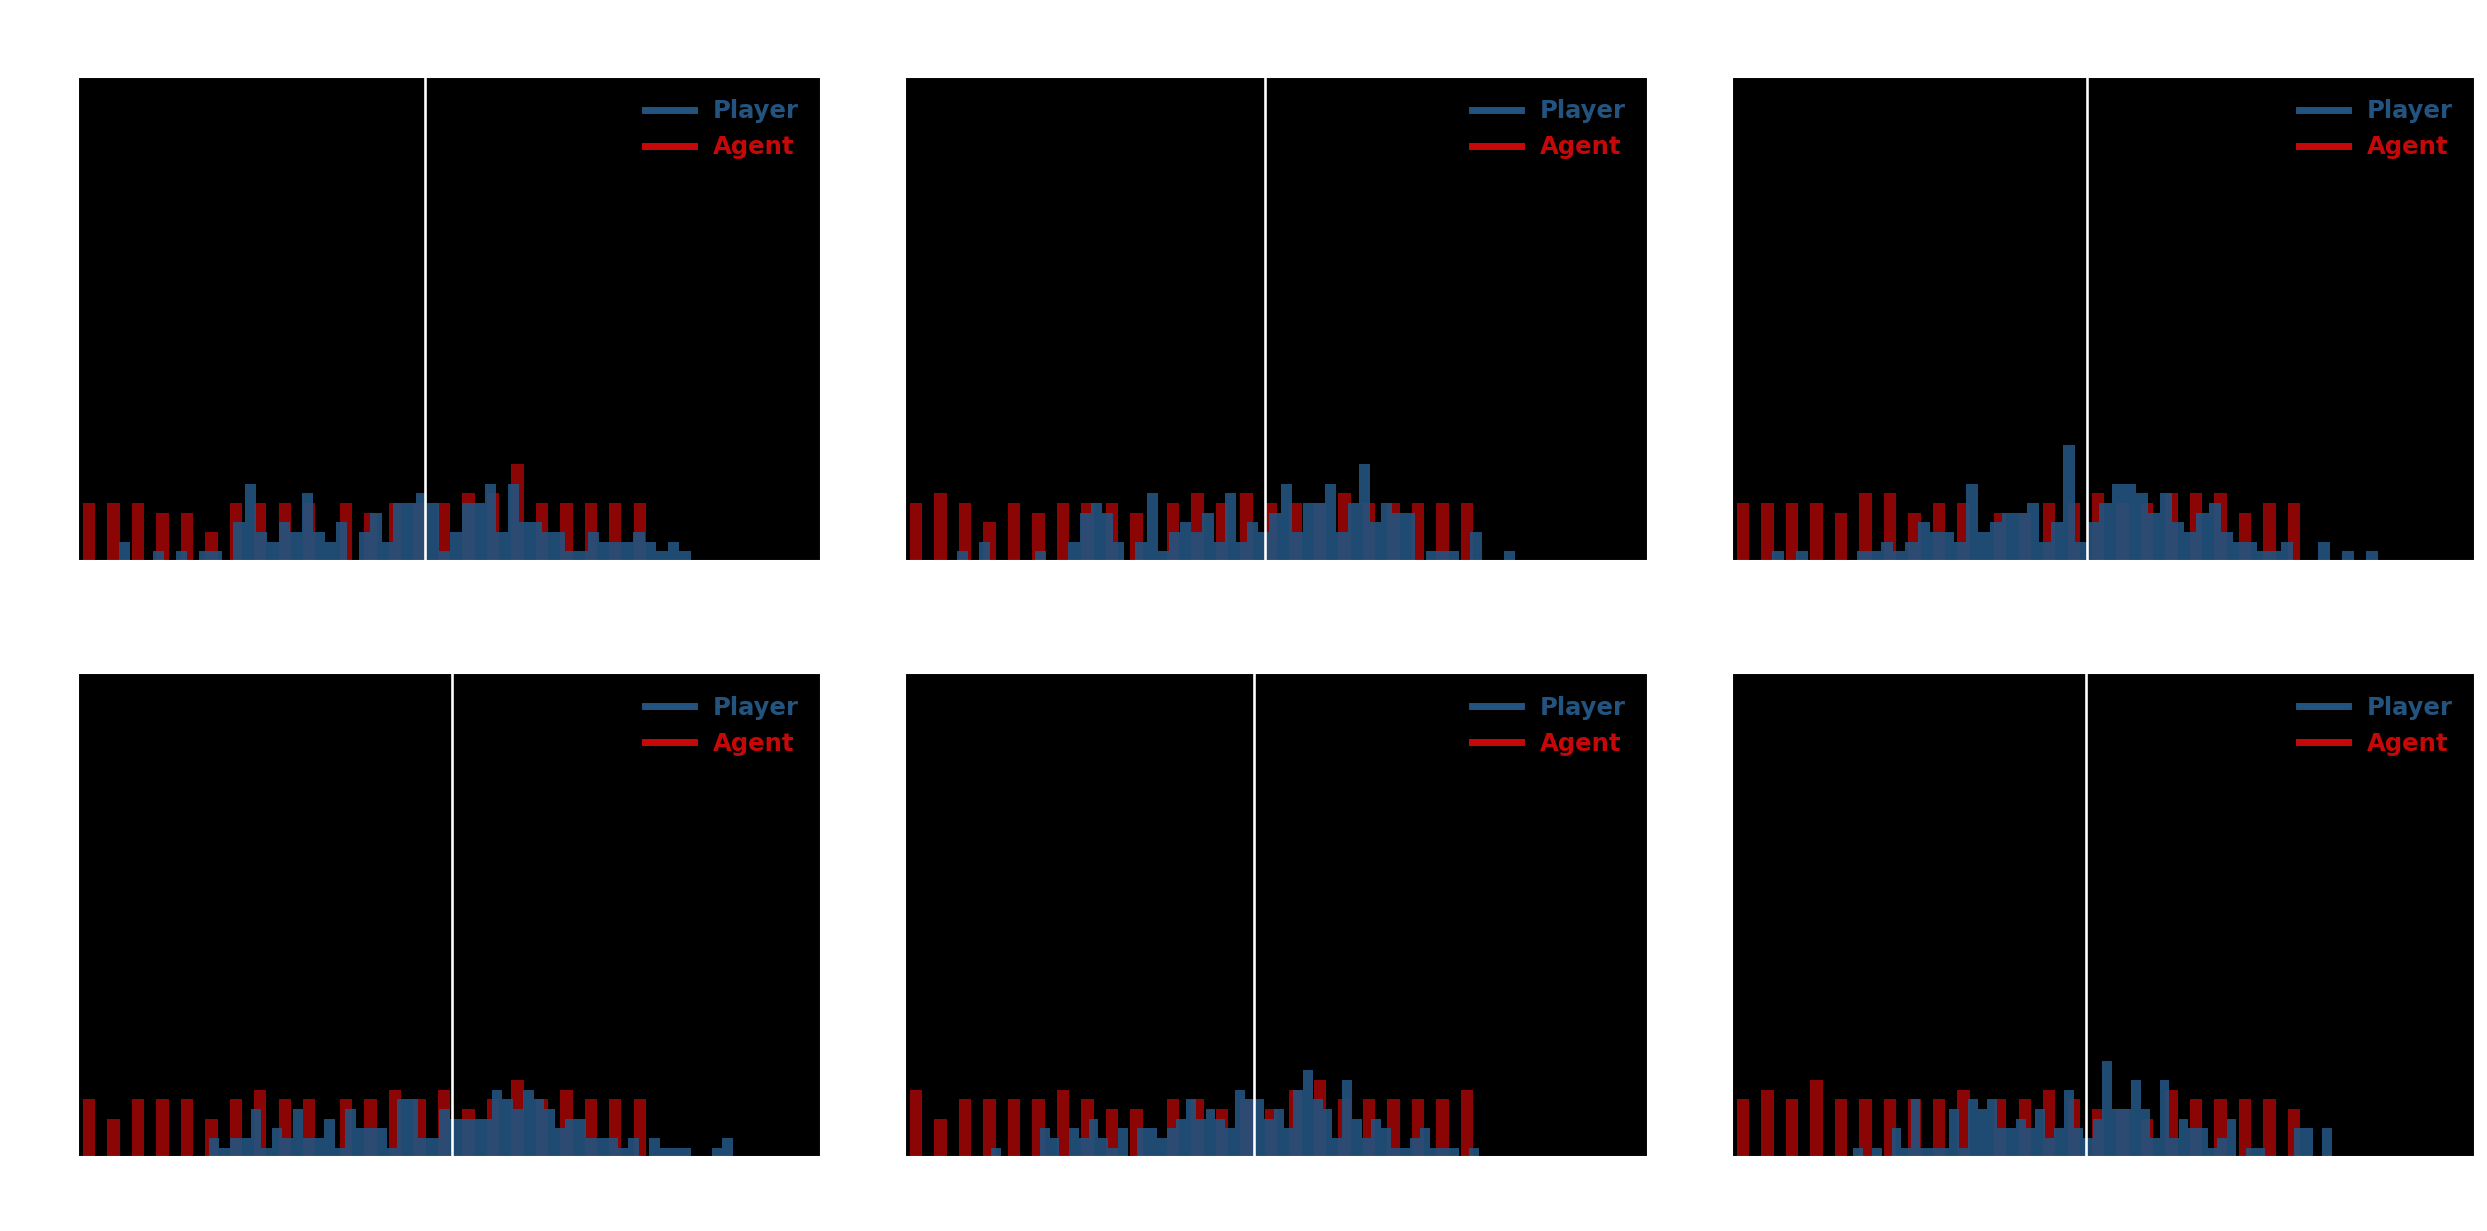

In [33]:
fig,axs = plt.subplots(2,3, figsize = (20,10), dpi = 125)
c = -1
d = 0
for j in range(num_blocks):
    c+=1
    axs[c,d].hist(all_agent_washout_decision_times_each_condition[j,:], histtype = 'stepfilled', color=wheel.dark_red, alpha = 0.7, bins = 50)
    axs[c,d].hist(all_player_washout_decision_times_each_condition[j,:], histtype = 'stepfilled', color = wheel.dark_blue, alpha = 0.9, bins =50)
    axs[c,d].axvline(all_player_washout_mean_decision_time_each_condition[j], c='w')
    axs[c,d].set_xlim(200,1900)
    axs[c,d].set_ylim(0,50)
    axs[c,d].set_xlabel('Time (ms)')
    axs[c,d].set_ylabel('Frequency')
    labels = ["Player", "Agent"]
    colors = [wheel.dark_blue, wheel.dark_red]
    dv.Custom_Legend(axs[c,d], labels, colors, fontsize=14)
    axs[c,d].set_title(trial_block_titles[j])
    if c == 1:
        d += 1
        c = -1
fig.suptitle(f'Player and Agent Decision Times', c = 'white')
plt.tight_layout()
##plt.savefig(PATH+SAVE_PATH+f'\\Sub{i+1}\\reach_time_distributions', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()

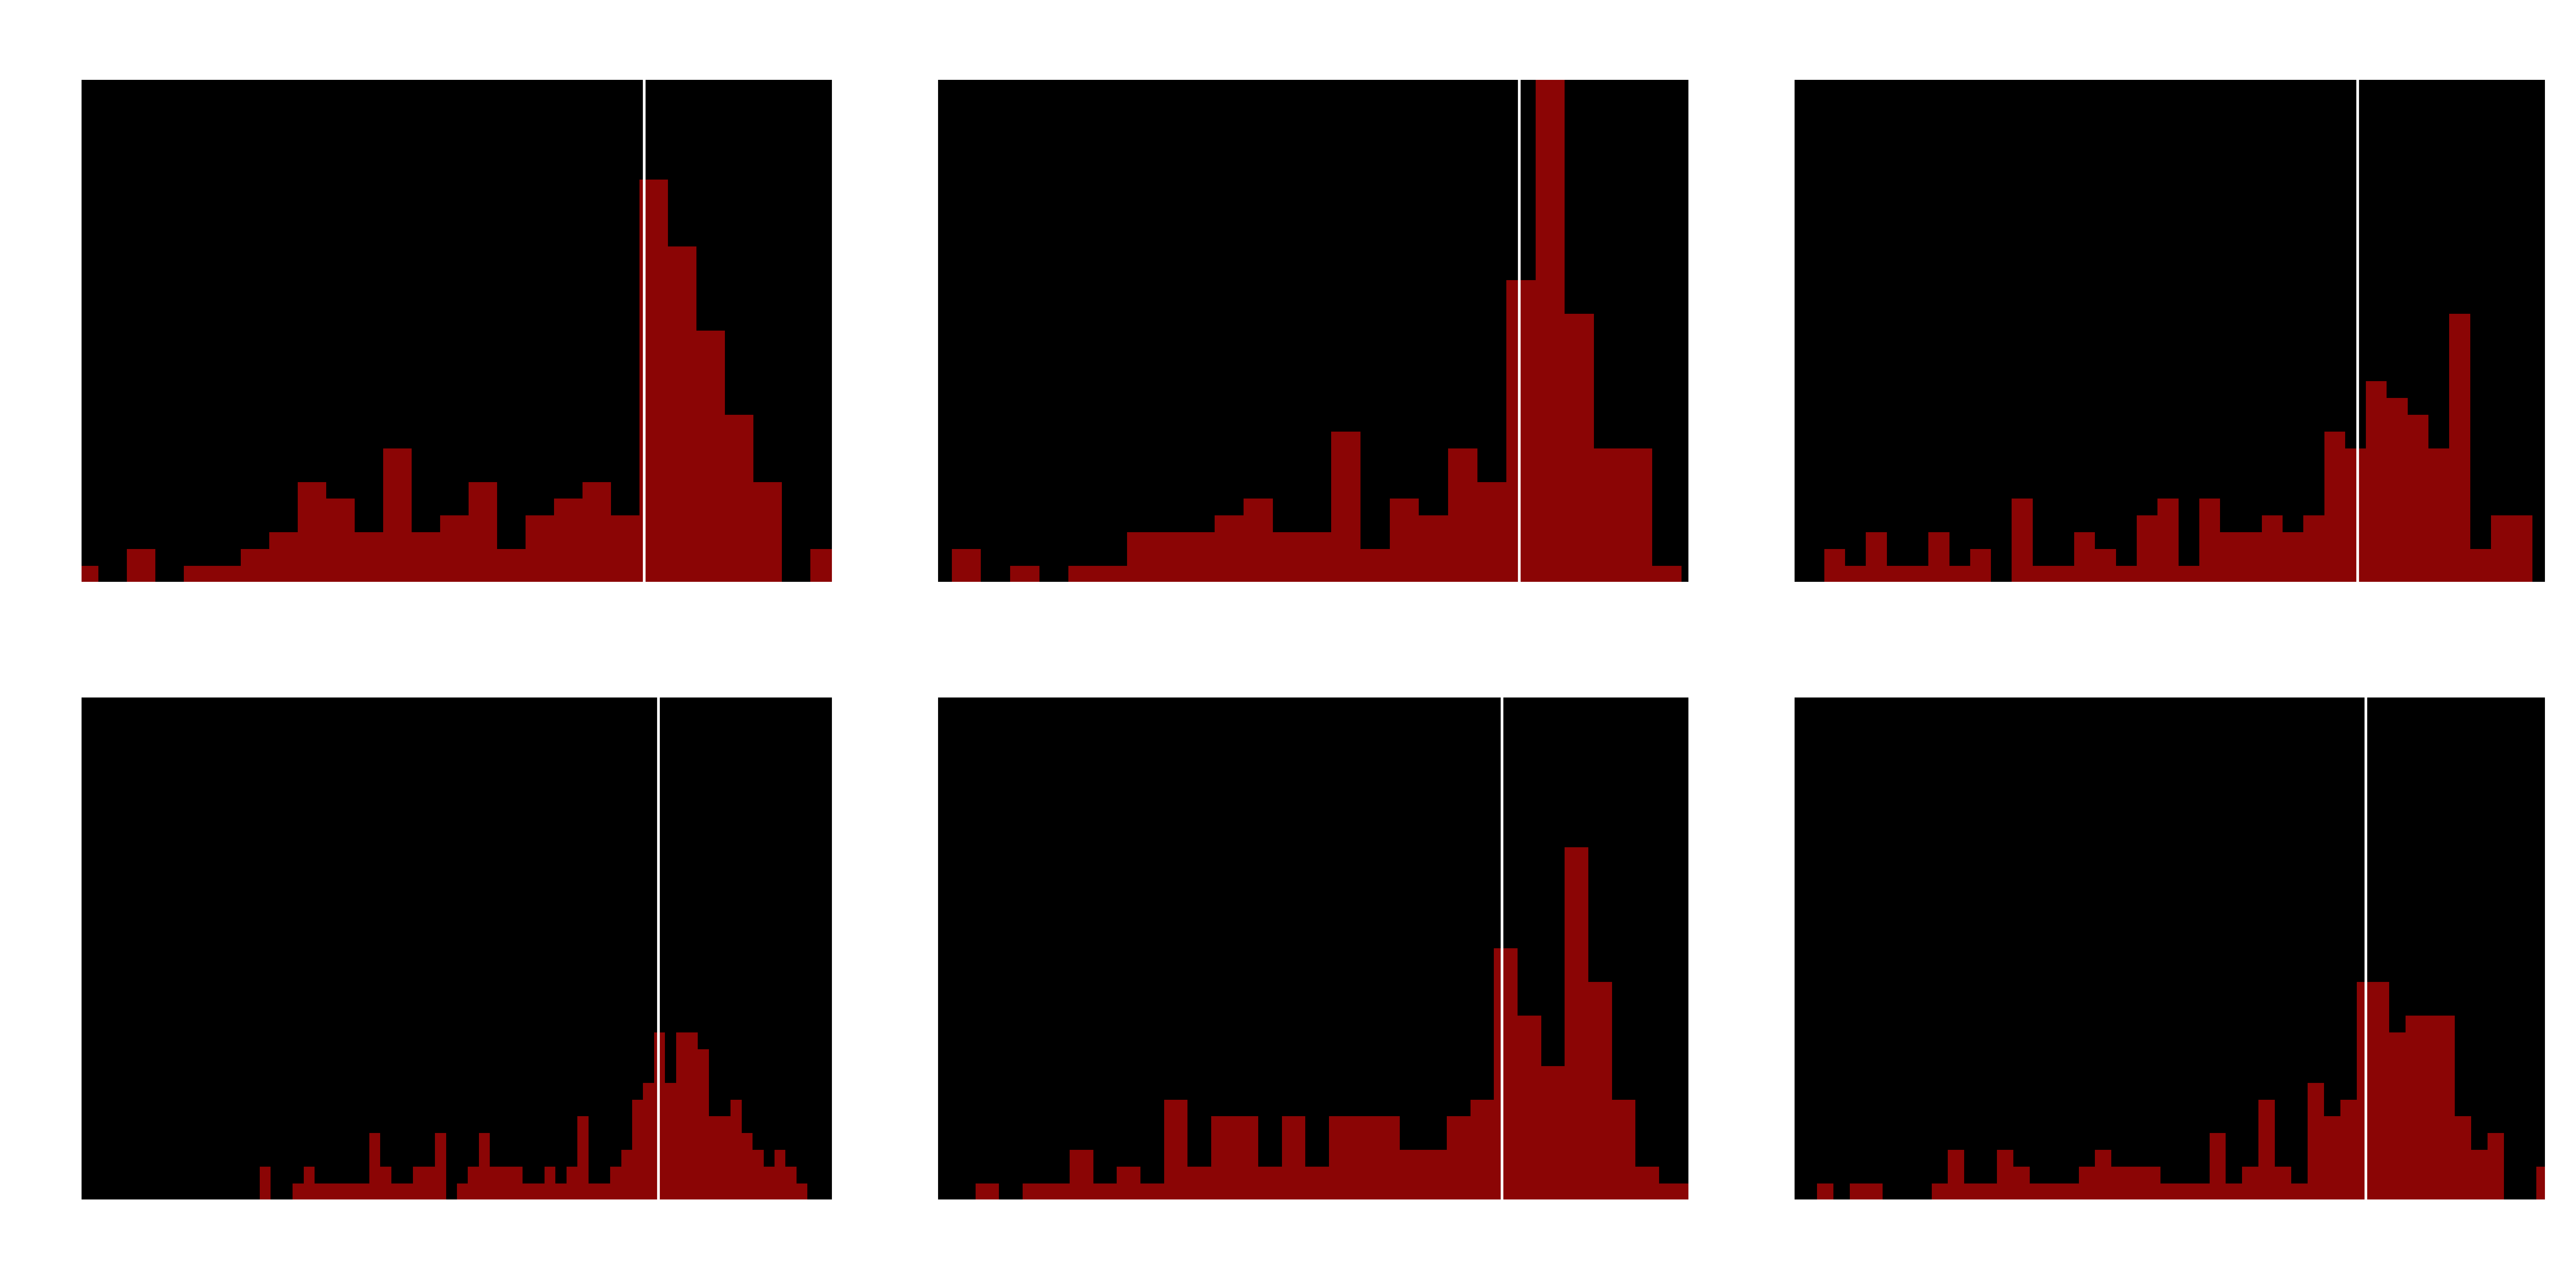

In [34]:
fig,axs = plt.subplots(2,3, figsize = (20,10), dpi = 300)
c = -1
d = 0
diff = all_player_washout_decision_times_each_condition - all_agent_washout_decision_times_each_condition 
median_diff = np.nanmedian(diff, axis = 1)
for j in range(num_blocks):
    c+=1
    axs[c,d].hist(diff[j,:], histtype = 'stepfilled', color=wheel.dark_red, alpha = 0.7, bins = 50)
    axs[c,d].axvline(median_diff[j], c='w')
    axs[c,d].set_xlim(-600,600)
    axs[c,d].set_ylim(0,30)
    axs[c,d].set_xlabel('Time (ms)')
    axs[c,d].set_ylabel('Frequency')
    labels = ["Player", "Agent"]
    colors = [wheel.dark_blue, wheel.dark_red]
    #dv.Custom_Legend(axs[c,d], labels, colors, fontsize=14, loc = 'upper left')
    axs[c,d].set_title(trial_block_titles[j])
    if c == 1:
        d += 1
        c = -1
fig.suptitle(f'Player - Agent Decision Times', c = 'white')
plt.tight_layout()
##plt.savefig(PATH+SAVE_PATH+f'\\Sub{i+1}\\reach_time_distributions', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()

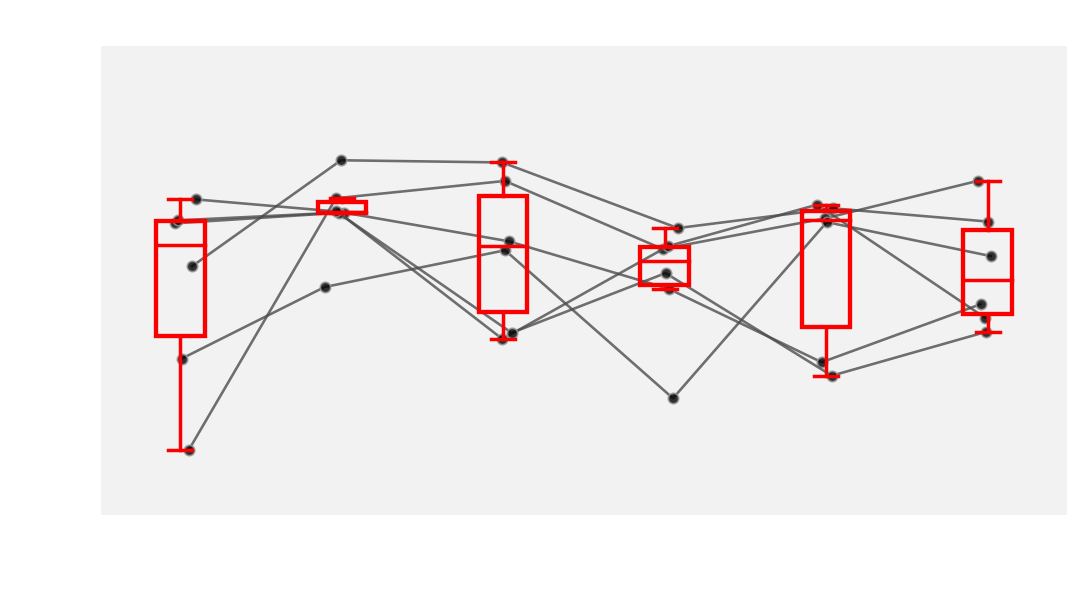

In [35]:
xlocs = np.arange(0, num_blocks)
ylocs = np.arange(400,1800,200)
plt.figure(dpi = 125, figsize = (10,5))
ax=plt.subplot()

ax.plot(jitter(xlocs, player_washout_mean_decision_time).T,player_washout_mean_decision_time.T, marker = 'o', markerfacecolor = dot_color, markeredgecolor = '0.6', color = '0.3', alpha = 0.8,zorder=1 )
boxplot(player_washout_mean_decision_time, box_widths=0.05, xlocs = xlocs, ylocs= ylocs, xlab = "Agent Mean,SD Decision Time (ms)",
        ylab='Time (ms)', title='Decision Times')
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylim(800,1200)
#plt.savefig(PATH+SAVE_PATH+'decision_times_boxplots', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()

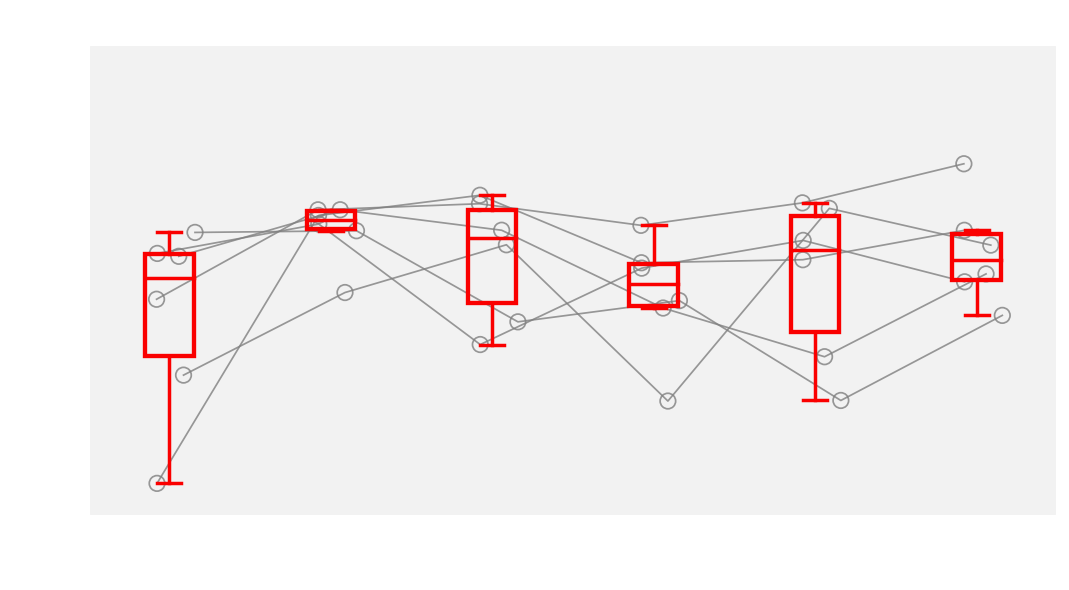

In [42]:
player_minus_agent_decision_time =  player_washout_decision_time - agent_washout_decision_time
mean_player_minus_agent_washout_decision_time = np.nanmean(player_minus_agent_decision_time, axis = 2)
xlocs = np.arange(0, num_blocks)
ylocs = np.arange(-500,500,100)
plt.figure(dpi=125, figsize = (10,5))
ax=plt.subplot()
dv.jitter_array(ax,xlocs,mean_player_minus_agent_washout_decision_time.T,0.1, circle_size = 80, circle_lw = 1,lw = 1, circle_alpha = 0.8, include_mean = False, )

boxplot(mean_player_minus_agent_washout_decision_time, box_widths=0.05, xlocs = xlocs, ylocs= ylocs, xlab = "Agent Mean,SD Decision Time (ms)",
        ylab='Time (ms)', title='(Player-Agent) Decision Times')
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylim(0,400)
#plt.savefig(PATH+SAVE_PATH+'decision_times_boxplots', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()

Wins

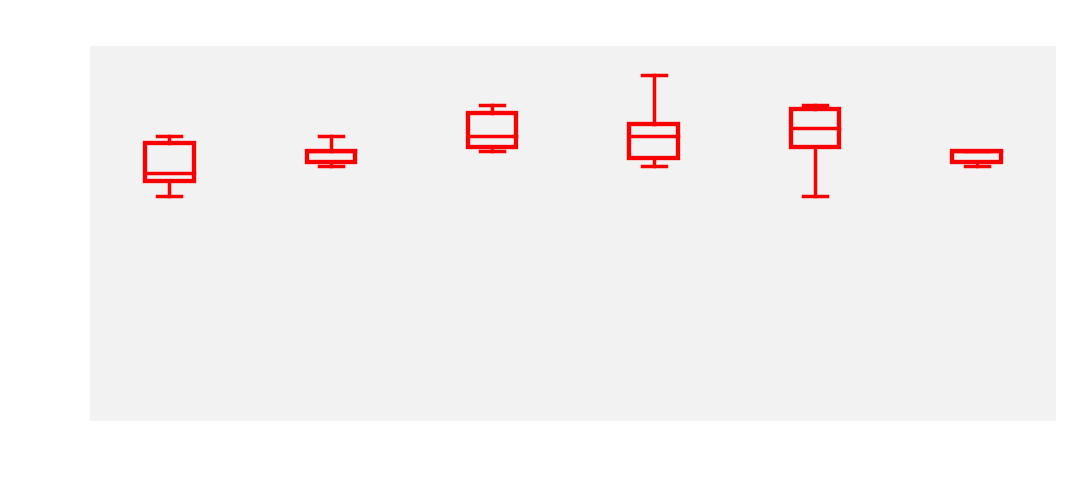

In [37]:
xlocs = np.arange(0, num_blocks)
ylocs = np.arange(0,125,25)
plt.figure(dpi=125, figsize=(10,4))
ax=plt.subplot()
boxplot(perc_player_washout_wins,box_widths = 0.05, xlocs=xlocs, ylocs=ylocs, xlab = "Agent Mean,SD Decision Time (ms)",
        ylab='Percentage (%)', title='Wins')
ax.set_ylim(0,100)
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
#plt.savefig(PATH+SAVE_PATH+'wins_boxplots_no_dots', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()

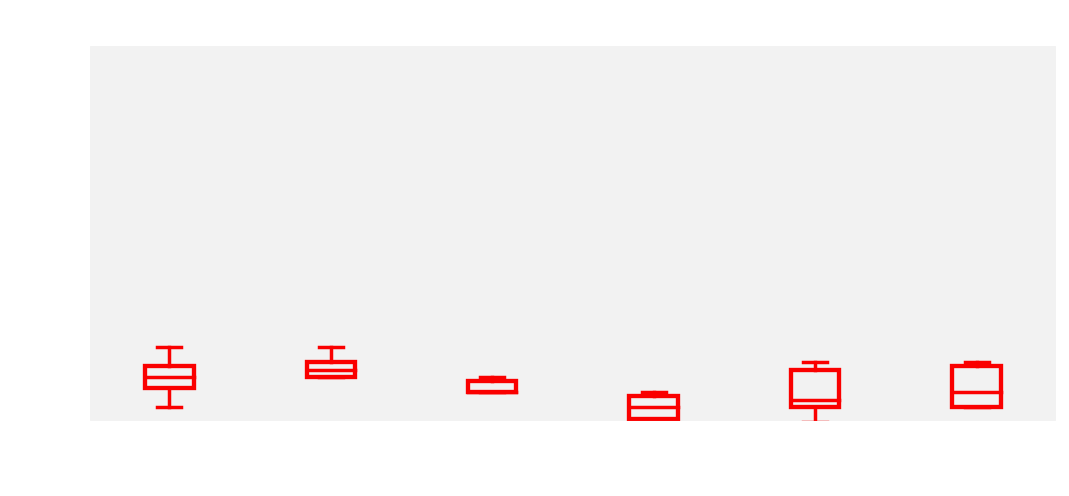

In [38]:
xlocs = np.arange(0, num_blocks)
ylocs = np.arange(0,125,25)
plt.figure(dpi=125, figsize=(10,4))
ax=plt.subplot()
boxplot(perc_player_washout_indecisions,box_widths = 0.05, xlocs=xlocs, ylocs=ylocs, xlab = "Agent Mean,SD Decision Time (ms)",
        ylab='Percentage (%)', title='Indecisions')
ax.set_ylim(0,100)
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
#plt.savefig(PATH+SAVE_PATH+'wins_boxplots_no_dots', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()

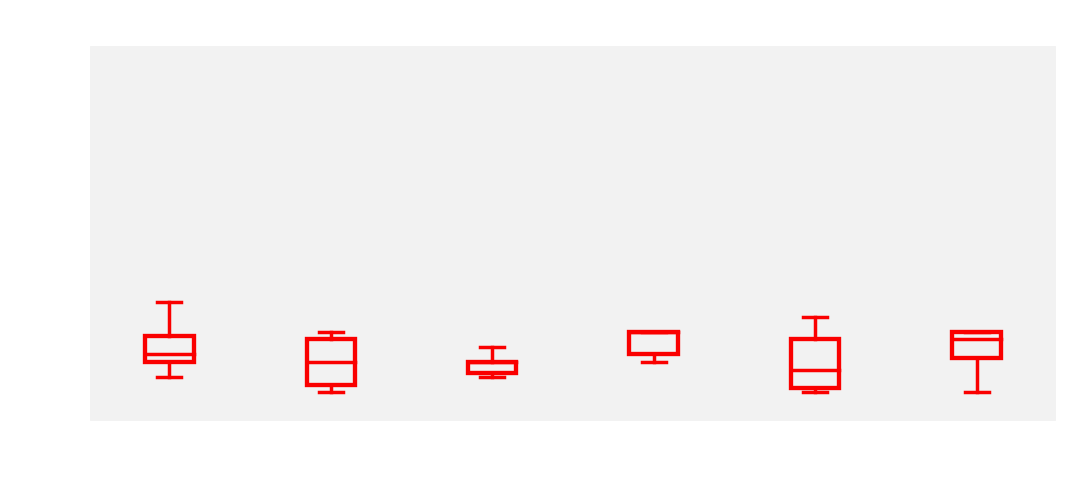

In [39]:
xlocs = np.arange(0, num_blocks)
ylocs = np.arange(0,125,25)
plt.figure(dpi=125, figsize=(10,4))
ax=plt.subplot()
boxplot(perc_player_washout_incorrects,box_widths = 0.05, xlocs=xlocs, ylocs=ylocs, xlab = "Agent Mean,SD Decision Time (ms)",
        ylab='Percentage (%)', title='Incorrects')
ax.set_ylim(0,100)
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
#plt.savefig(PATH+SAVE_PATH+'wins_boxplots_no_dots', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()

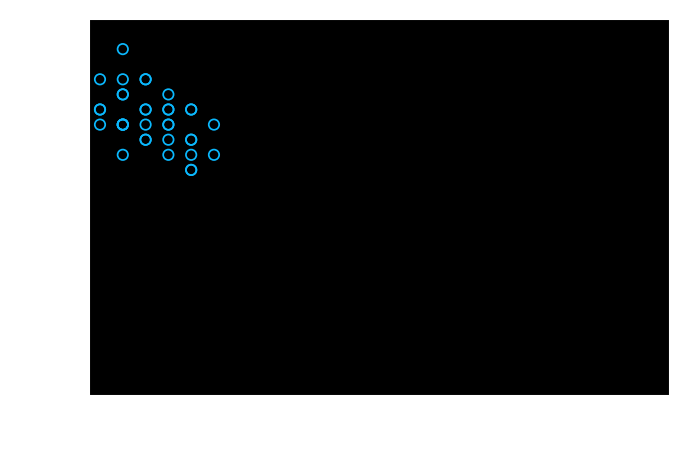

In [40]:
fig,ax = plt.subplots(dpi = 125)
ax.scatter(perc_player_washout_indecisions, perc_player_washout_wins, facecolor='none', edgecolors=wheel.rak_blue)
ax.set_xlabel('Indecisions')
ax.set_ylabel('Wins')
ax.set_xlim(-2,100)
ax.set_ylim(0,100)
plt.show()

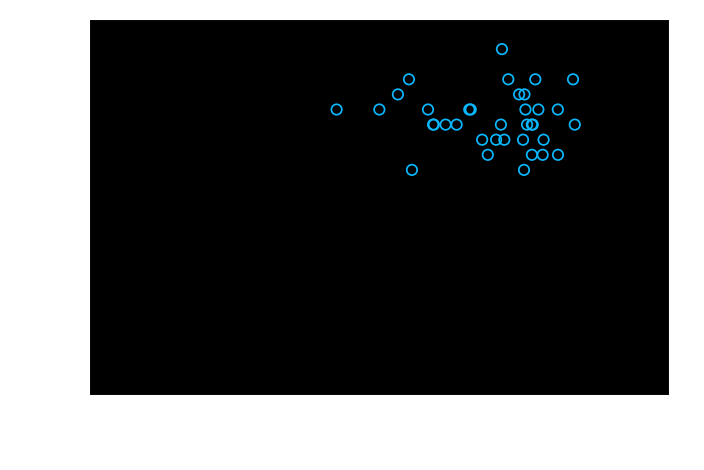

In [41]:
fig,ax = plt.subplots(dpi = 125)
ax.scatter(player_washout_mean_decision_time, perc_player_washout_wins, facecolor='none', edgecolors=wheel.rak_blue)
ax.set_xlabel('Mean Decision Time (ms)')
ax.set_ylabel('Wins')
ax.set_xlim(600,1200)
ax.set_ylim(0,100)
plt.show()